# Figure 3

## Caption
Time-invariant locations of A) municipal water intake sites B) beaches C) recreational boating. Symbol color represents normalized usage for each index. Red shading indicates the number of days a threshold of 0.4 gPL-1 is exceeded at each model point in A) June B) July and C) August. For clarity of presentation, time-invariant ecosystem services are plotted on the map only for a single month. Cumulative Stress Days (CSD) calculations (equation 2) include plume impacts on all three services in each month. 


In [9]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.size']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['axes.labelsize']=12
rcParams['axes.titlesize']=12

import numpy as np
import xarray as xr
import pandas as pd
import cmocean
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.lines import Line2D


# Load data

In [10]:
dir_raw = '/Users/gloege/Documents/Projects/MITgcm-Michigan-Phosphorus/data/raw/'
dir_clean = '/Users/gloege/Documents/Projects/MITgcm-Michigan-Phosphorus/data/clean/'
ds_ed = xr.open_dataset(f'{dir_clean}exceedance_days_all_rivers_MJJA.nc')
ds_grid = xr.open_dataset(f'{dir_raw}grid_lake_michigan.nc')
ds_es = xr.open_dataset(f'{dir_clean}normalized_es.nc')

# Generate figure 
This allows you to fine tune the plot with AxesGrid

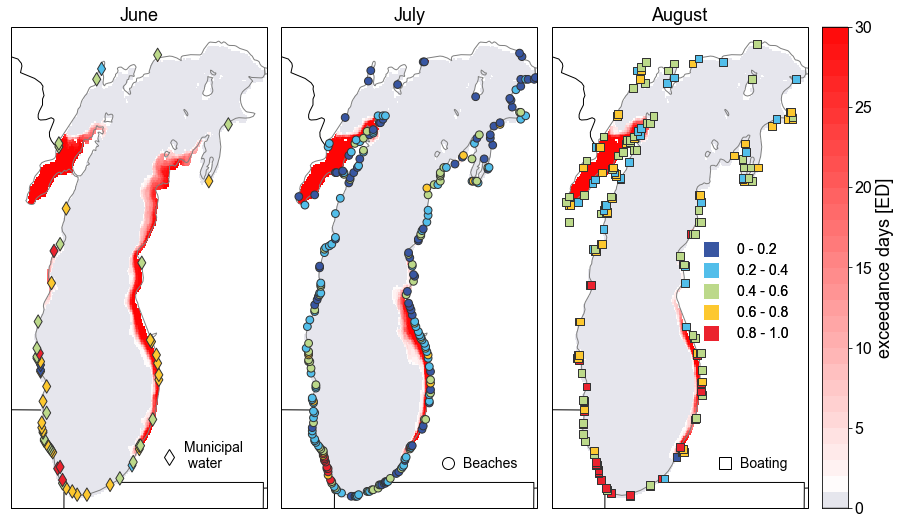

In [11]:
fig = plt.figure(figsize=(15, 15))
projection = ccrs.Mercator()
axes_class = (GeoAxes, dict(map_projection=projection))
grid = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 3),
                axes_pad=0.2,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='10%',
                label_mode='')  # note the empty label_mode

### ==============================================================
### Set boundary
### ==============================================================
for ax in grid:
    ax.set_extent([-84.75, -88.25, 41.5, 46.25]) ### Michigan


### ==============================================================
### Colormap of data
### ============================================================== 
### Define colormap
### This is really hackey to make extend=max work
num_levels = 31
vmin, vmax = 0, 30
midpoint = 1
n_levels = np.linspace(vmin, vmax, num_levels) # <--hacky
levels = np.linspace(vmin, vmax, num_levels+1) # <--hacky
midp = np.mean(np.c_[levels[:-1], levels[1:]], axis=1)
vals = np.interp(midp, [vmin, midpoint, vmax], [0, 0.5, 1])
colors = cmocean.cm.balance(vals)
colors = plt.cm.bwr(vals)
colors[0] = (0.9, 0.9, 0.93, 1.0)
cmap, norm = from_levels_and_colors(n_levels, colors, extend='max')

### Month and title
month = ['june', 'july', 'august']
title = ['June', 'July', 'August']

### Loop over each axis
for ax, mon, title in zip(grid, month, title):
    pos = ax.pcolormesh(ds_ed['X'].values, 
                        ds_ed['Y'].values, 
                        np.ma.masked_array(ds_ed['cumulative'].
                          where(ds_ed['month']==mon).
                          dropna('month').
                          squeeze().
                          values, mask=(ds_grid['Depth'].values==0)),
                        cmap = cmap, 
                        norm = norm,
                        vmin = vmin, 
                        vmax = vmax,
                        transform=ccrs.PlateCarree(),
                        zorder = 2)
    pos.axes.set_title(title, fontsize=18)
    
### ==============================================================
### Create a feature for States/Admin 1 
### regions at 1:50m from Natural Earth
### ==============================================================
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
for ax in grid:
    ax.add_feature(states_provinces, 
                   edgecolor='black', 
                   facecolor='none', 
                   zorder=1)


### ==============================================================
### Create a feature for lakes at 1:50m from Natural Earth
### ==============================================================
lakes_50m = cfeature.NaturalEarthFeature(
    category='physical',
    name='lakes',
    scale='10m',
    facecolor='none')
for ax in grid:
    ax.add_feature(lakes_50m, 
                   edgecolor=(0.5,0.5,0.5), 
                   facecolor='none', 
                   zorder=2)

    
### ==============================================================
### Add ecosystem services 
### ==============================================================
### Symbols for service legend
square = Line2D(range(1), range(1), 
                color="white", 
                marker='s', 
                markersize=12, 
                markeredgecolor = 'k', 
                markerfacecolor='None')
circle = Line2D(range(1), range(1), 
                color="white", 
                marker='o', 
                markersize=12, 
                markeredgecolor = 'k', 
                markerfacecolor='None')
diamond = Line2D(range(1), range(1), 
                  color="white", 
                  marker='d', 
                  markersize=12, 
                  markeredgecolor = 'k',
                  markerfacecolor='None')

### define ES colors
darkBlue = (56/255, 86/255, 162/255, 1)
lightBlue = (82/255, 190/255, 234/255, 1)
lightGreen = (188/255, 217/255, 138/255, 1)
gold = (253/255, 200/255, 47/255, 1.0)
red = (235/255, 34/255, 46/255, 1.0)
gray = (0.5, 0.5, 0.5, 1.0)

### Color swatches for service legend
darkBlueSquare = Line2D(range(1), range(1), 
                        color="white", 
                        marker='s', 
                        markersize=16, 
                        markerfacecolor=darkBlue)
lightBlueSquare = Line2D(range(1), range(1), 
                         color="white", 
                         marker='s', 
                         markersize=16, 
                         markerfacecolor=lightBlue)
lightGreenSquare = Line2D(range(1), range(1), 
                          color="white",
                          marker='s', 
                          markersize=16, 
                          markerfacecolor=lightGreen)
goldSquare = Line2D(range(1), range(1), 
                    color="white", 
                    marker='s', 
                    markersize=16, 
                    markerfacecolor=gold)
redSquare = Line2D(range(1), range(1), 
                   color="white", 
                   marker='s', 
                   markersize=16, 
                   markerfacecolor=red )


### define colormap
cmap = cmocean.cm.amp
cmap.N = 5
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = darkBlue
cmaplist[1] = lightBlue
cmaplist[2] = lightGreen
cmaplist[3] = gold
cmaplist[4] = red
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,1,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

### Model grid points
### mask non-ES sites usiing .where(ES>0)
X,Y = np.meshgrid(ds_es['X'].values, 
                  ds_es['Y'].values)

# Plot beach Locations
water_plot = grid[0].scatter(X, Y,
                             c=ds_es['water_norm'].where(ds_es['water_norm']>0).values, 
                             edgecolors=[0.2, 0.2, 0.2], 
                             cmap=cmap,
                             norm=norm,
                             s=90, 
                             zorder=20,
                             transform=ccrs.PlateCarree(),
                             marker='d',
                             label='Municipal \n water')

# water Legend
grid[0].legend([diamond], ['Municipal \n water'], 
               loc='lower right',  
               bbox_to_anchor=(0.97, 0.05),  
               frameon=False, 
               fontsize=14,  
               labelspacing=1,
               handletextpad=0.03,
               markerscale=1.)
        
beach_plot = grid[1].scatter(X, Y,
                         c=ds_es['beaches_norm'].where(ds_es['beaches_norm']>0).values, 
                         edgecolors=[0.2, 0.2, 0.2], 
                         cmap=cmap,
                         norm=norm,
                         s=60, 
                         zorder=20,
                         transform=ccrs.PlateCarree(),
                         marker='o',
                         label='Beaches')

# Beach Legend
grid[1].legend([circle], ['Beaches'], 
               loc='lower right',  bbox_to_anchor=(0.97, 0.05),  
               frameon=False,         
               fontsize=14,  
               labelspacing=1,
               handletextpad=0.03,
               markerscale=1.)

boating_plot = grid[2].scatter(X, Y,
                        c=ds_es['boating_norm'].where(ds_es['boating_norm']>0).values, 
                        edgecolors=[0.2, 0.2, 0.2], 
                        cmap=cmap,
                        norm=norm,
                        s=60, 
                        zorder=20,
                        transform=ccrs.PlateCarree(),
                        marker='s',
                        label='Boating')

# boating Legend
legend_boating = grid[2].legend([square], ['Boating'], 
                                loc='lower right',  
                                bbox_to_anchor=(0.97, 0.05),  
                                frameon=False, 
                                fontsize=14,  
                                labelspacing=1,
                                handletextpad=0.03,
                                markerscale=1.)

### ==============================================================
### Add colorbar
### ==============================================================
cbar = grid.cbar_axes[0].colorbar(pos)
cbar.set_label_text(r'exceedance days [ED]', fontsize=18)
cbar.ax.set_yticks(np.arange(0, 32, 5))
cbar.ax.tick_params(labelsize=16)

#========================================================
# Legend for service uses color swatches
#========================================================
legList = [darkBlueSquare ,lightBlueSquare, lightGreenSquare, goldSquare, redSquare]
legend_swatches = grid[2].legend(legList,
                     ["0 - 0.2", "0.2 - 0.4", "0.4 - 0.6", "0.6 - 0.8", "0.8 - 1.0"], 
                     loc = "center left", 
                     bbox_to_anchor = (0.52, 0.45), 
                     frameon = 0,
                     fontsize = 14, 
                     numpoints = 1)

### So both axes appear on same plot
grid[2].add_artist(legend_swatches)
grid[2].add_artist(legend_boating)

#plt.tight_layout()